# Task-3: Exploratory Data Analysis (EDA)

## Description:
### Understand trends and distributions in the data.
### Generate summary statistics (mean, median, mode).
### Create visualizations for numerical columns (histograms, box plots).
### Analyze churn rates (e.g., churn vs. non-churn proportions).

# Import Necessary Libraries

In [130]:
#Step-1:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading the Dataset

In [131]:
#Step-2:
df = pd.read_csv("Telco_Customer_Churn.csv")

# Preview

In [132]:
#Step-3: Display the first few rows
display(Markdown("### Preview of the Dataset"))
display(df.head())

### Preview of the Dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
print(df.describe())
print(df.info())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

In [134]:
#Step-4:
display(Markdown("### Summary Statistics"))
display(df.describe(include='all'))

### Summary Statistics

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Clean the Column

In [135]:
#Step-5: Clean 'TotalCharges' Column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

## Summary statistics (mean, median, mode)

In [136]:
#Step-6: Mean,Median,Mode
summary_stats = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].describe().T
summary_stats['mode'] = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].mode().iloc[0]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)
print("Summary Statistics:\n", summary_stats[['mean', 'median', 'mode']])

Summary Statistics:
                        mean    median   mode
tenure            32.421786    29.000   1.00
SeniorCitizen      0.162400     0.000   0.00
MonthlyCharges    64.798208    70.350  20.05
TotalCharges    2283.300441  1397.475  20.20


## Visual Style

In [137]:
#Step-7: Set visual style
sns.set(style="whitegrid")

 ## Histograms

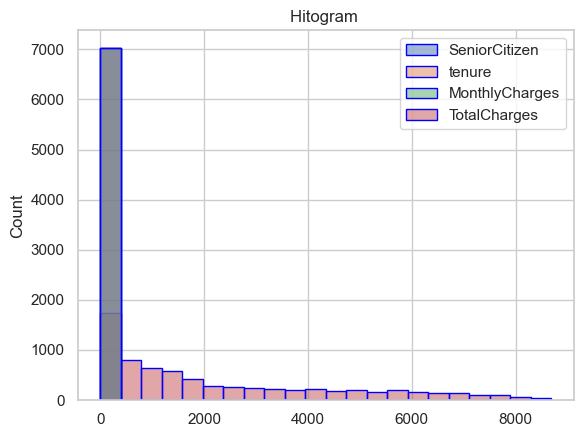

In [138]:
#Step-8:
sns.histplot(data = df,  bins =22,edgecolor ='blue')
plt.title("Hitogram ")
plt.show()

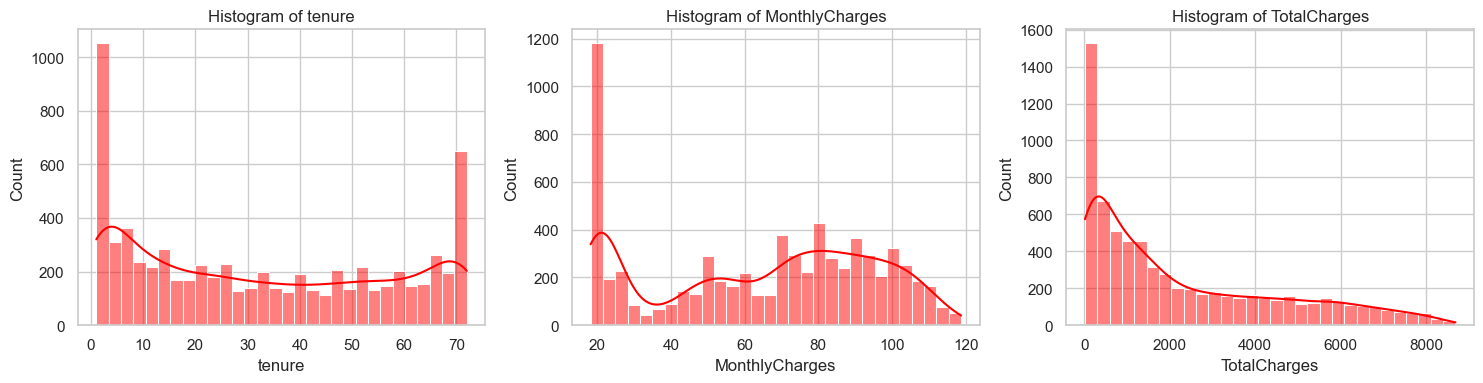

In [139]:
#Step-9: Histograms of DataSet(Count of [tenure,MonthlyCharges,TotalCharges])
plt.figure(figsize=(15, 4))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='red')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

## Box-plots

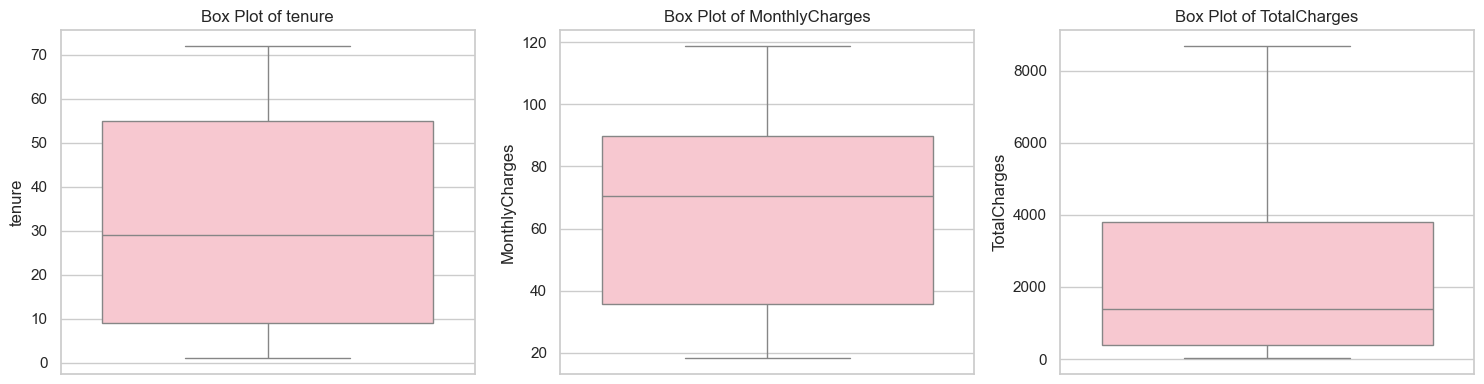

In [140]:
#Step-10:
plt.figure(figsize=(15, 4))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='Pink')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## Churn Rate(%)

In [141]:
#Step-11: Churn Analysis
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

print("\nChurn Rate (%):")
print(churn_percent.round(2))


Churn Rate (%):
Churn
No     73.42
Yes    26.58
Name: count, dtype: float64


## Bar Chart

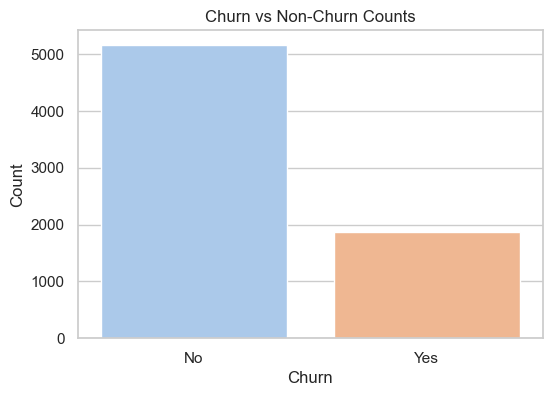

In [142]:
#Step-12:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='pastel', legend=False)
plt.title('Churn vs Non-Churn Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Pair plot

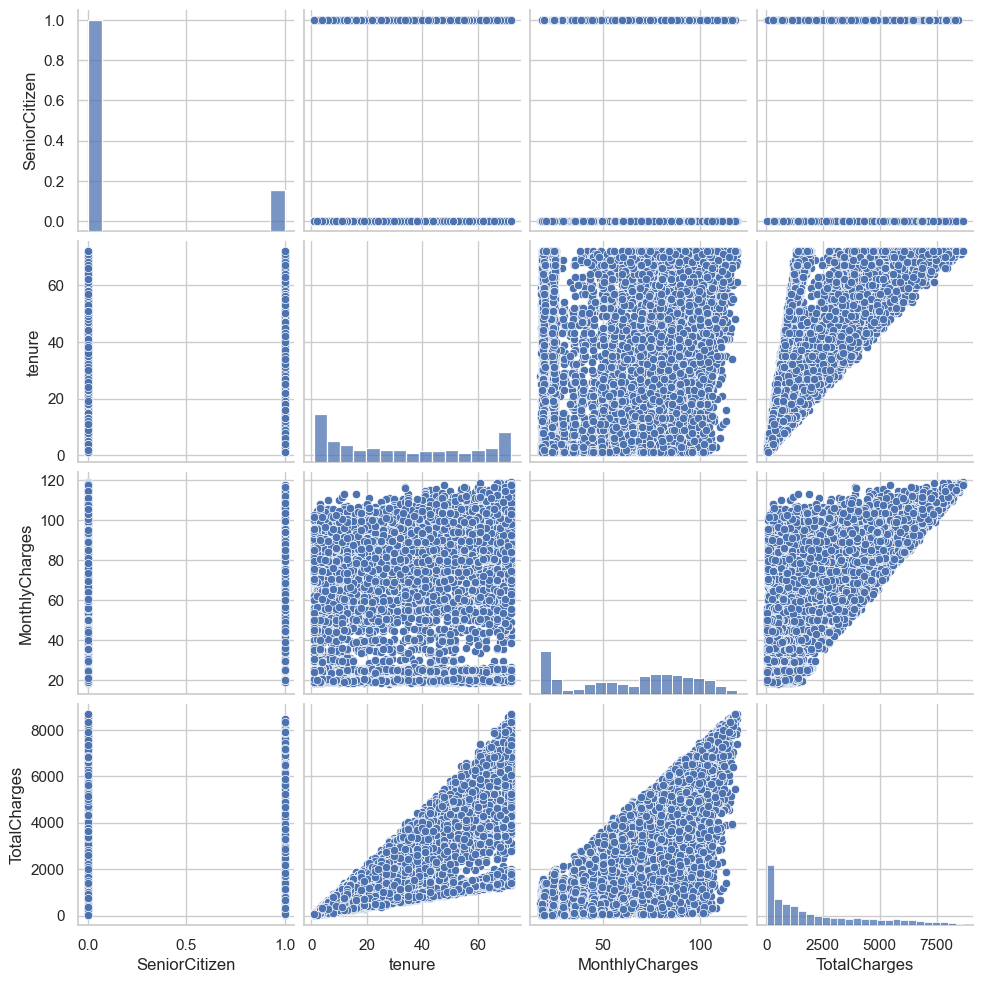

In [143]:
#Step-13:
sns.pairplot(data=df)
plt.show()

## Box-plot (Churn vs. Numerical Features [tenure, Charges])

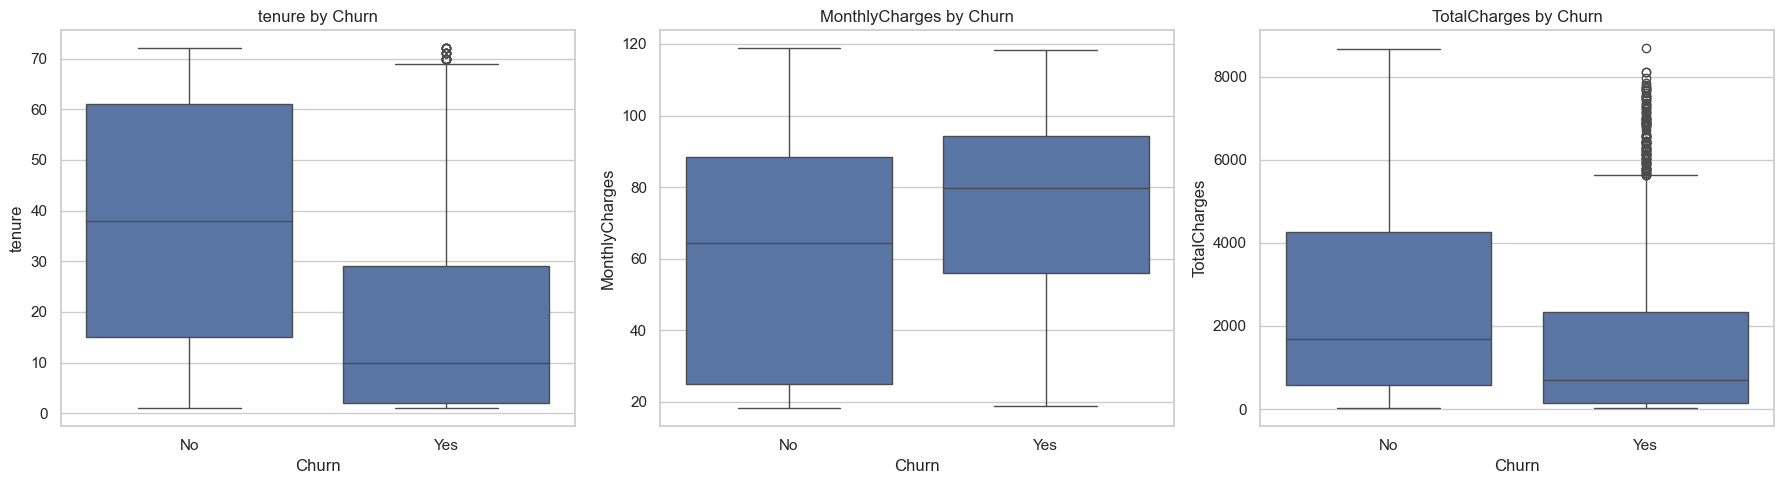

In [144]:
#step-14:
plt.figure(figsize=(18, 5))
for i, feature in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=feature, data=df)  # Removed palette
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

## Churn by Payment Method and Paperless Billing

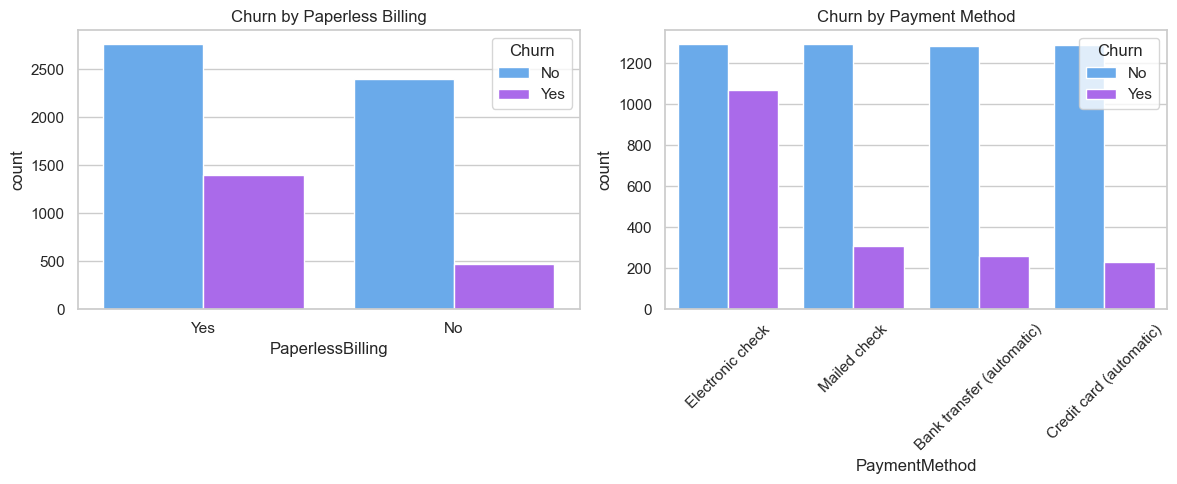

In [145]:
#Step-15:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='cool')
plt.title('Churn by Paperless Billing')

plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='cool')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Heatmap

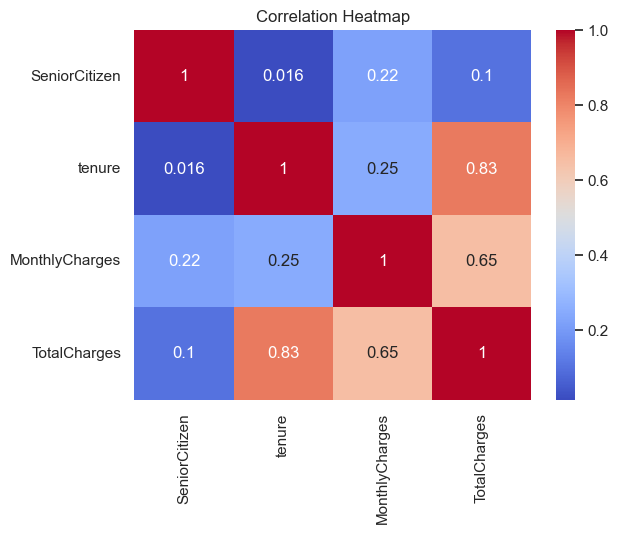

In [146]:
#Step-16: Correlation Heatmap
corr_matr = df.corr(numeric_only = True)
sns.heatmap(corr_matr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Histogram (Count of [tenure, MonthlyCharges, TotalCharges] distribution by Churn)

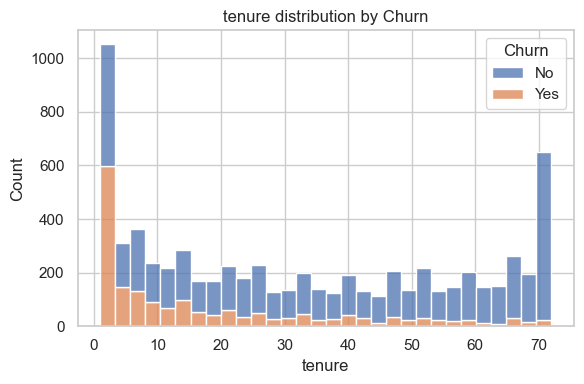

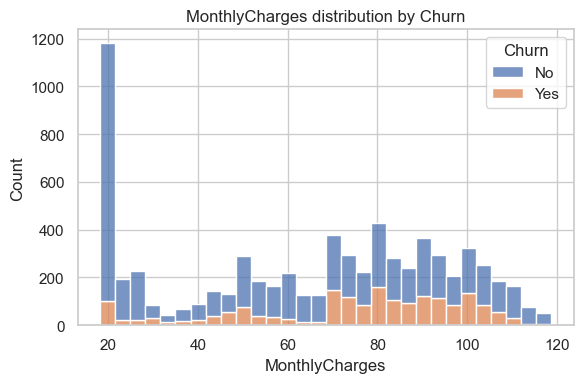

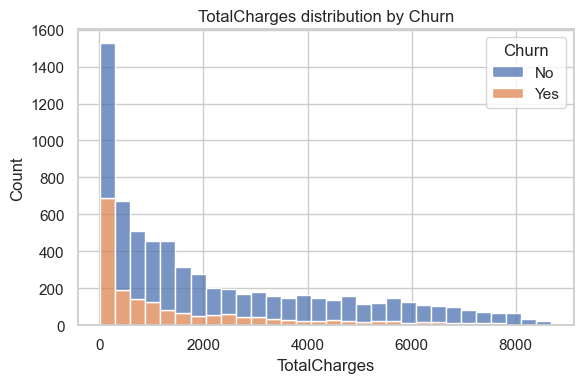

In [147]:
#Step-17:
# Define the list of numerical columns you want to analyze
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot histograms for churned vs non-churned customers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30)
    plt.title(f'{col} distribution by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Features:

In [148]:
#Step-18:
# Use the correctly cased column names from your DataFrame
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# If needed, convert back to a DataFrame:
scaled_df = pd.DataFrame(scaled_features, columns=features)

print(scaled_df.head())

     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457


In [149]:
#Step-19:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df['pca1'] = pca_features[:, 0]
df['pca2'] = pca_features[:, 1]

## Scatterplot

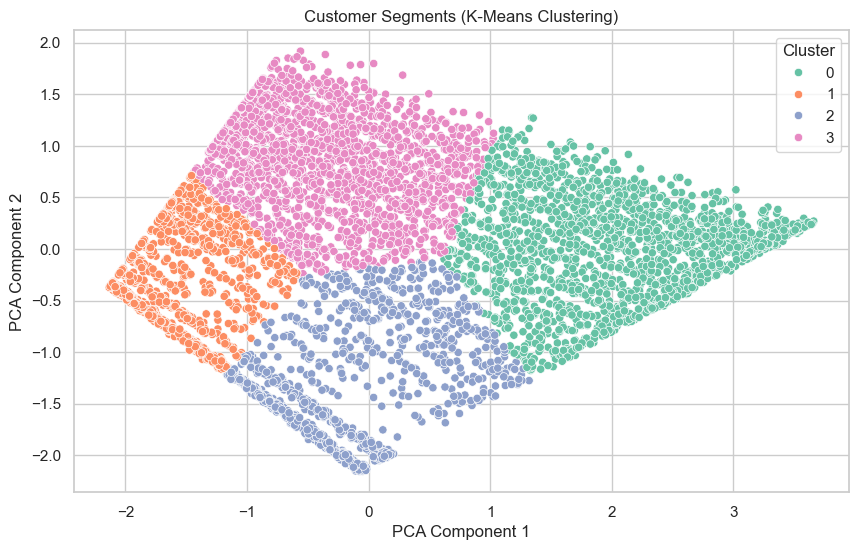

In [150]:
#Step-20:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()